# Library

In [1]:
import numpy as np 

import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns

# Gathering Data

In [2]:
database=pd.read_csv("loan_data_2007_2014.csv",index_col=0)
database.head()

C:\Users\User\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3444: DtypeWarning: Columns (20) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
0,1077501,1296599,5000,5000,4975.0,36 months,10.65,162.87,B,B2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27,59.83,C,C4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96,84.33,C,C5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49,339.31,C,C1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69,67.79,B,B5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
database.shape

(466285, 74)

Mencari tau berapa banyak baris dan kolom pada query

# Drop Null


In [4]:
database.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 466285 entries, 0 to 466284
Data columns (total 74 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   id                           466285 non-null  int64  
 1   member_id                    466285 non-null  int64  
 2   loan_amnt                    466285 non-null  int64  
 3   funded_amnt                  466285 non-null  int64  
 4   funded_amnt_inv              466285 non-null  float64
 5   term                         466285 non-null  object 
 6   int_rate                     466285 non-null  float64
 7   installment                  466285 non-null  float64
 8   grade                        466285 non-null  object 
 9   sub_grade                    466285 non-null  object 
 10  emp_title                    438697 non-null  object 
 11  emp_length                   445277 non-null  object 
 12  home_ownership               466285 non-null  object 
 13 

mengecek tipe dari masing masing atribut dan melihat berapa banyak nilai non-nullnya

In [5]:
drop_col =[]
def handling_mv(database):    
    for col in database.columns:
        percent = database[col].isnull().sum()*100/len(database)
        if percent >= 75:
            drop_col.append(col)
    return drop_col
handling_mv(database)

['mths_since_last_record',
 'mths_since_last_major_derog',
 'annual_inc_joint',
 'dti_joint',
 'verification_status_joint',
 'open_acc_6m',
 'open_il_6m',
 'open_il_12m',
 'open_il_24m',
 'mths_since_rcnt_il',
 'total_bal_il',
 'il_util',
 'open_rv_12m',
 'open_rv_24m',
 'max_bal_bc',
 'all_util',
 'inq_fi',
 'total_cu_tl',
 'inq_last_12m']

In [6]:
drop_col=[
 'mths_since_last_record',
 'mths_since_last_major_derog',
 'annual_inc_joint',
 'dti_joint',
 'verification_status_joint',
 'open_acc_6m',
 'open_il_6m',
 'open_il_12m',
 'open_il_24m',
 'mths_since_rcnt_il',
 'total_bal_il',
 'il_util',
 'open_rv_12m',
 'open_rv_24m',
 'max_bal_bc',
 'all_util',
 'inq_fi',
 'total_cu_tl',
 'inq_last_12m'
]

menyimpan nama kolom yang berisi 75% Null

In [7]:
data_raw=database.drop(drop_col,axis=1)

menghapus kolom bernilai 75% Null

In [8]:
data_raw.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 466285 entries, 0 to 466284
Data columns (total 55 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   id                          466285 non-null  int64  
 1   member_id                   466285 non-null  int64  
 2   loan_amnt                   466285 non-null  int64  
 3   funded_amnt                 466285 non-null  int64  
 4   funded_amnt_inv             466285 non-null  float64
 5   term                        466285 non-null  object 
 6   int_rate                    466285 non-null  float64
 7   installment                 466285 non-null  float64
 8   grade                       466285 non-null  object 
 9   sub_grade                   466285 non-null  object 
 10  emp_title                   438697 non-null  object 
 11  emp_length                  445277 non-null  object 
 12  home_ownership              466285 non-null  object 
 13  annual_inc    

# Drop Duplicated Value

In [9]:
data_raw.id.nunique()

466285

In [10]:
data_raw.member_id.nunique()

466285

id atau member id memiliki nilai unik yang sama dengan banyak baris. Hal ini menunjukkan bahwa setiap baris mewakili setiap individu. 

In [11]:
data_raw.drop(columns=['id','member_id'],inplace=True)

Menghapus kolom id dan member_id karena tidak mempengaruhi hasil analisis

In [12]:
data_raw.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,...,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim
0,5000,5000,4975.0,36 months,10.65,162.87,B,B2,NaN,10+ years,...,171.62,NaN,Jan-16,0.0,1,INDIVIDUAL,0.0,NaN,NaN,NaN
1,2500,2500,2500.0,60 months,15.27,59.83,C,C4,Ryder,< 1 year,...,119.66,NaN,Sep-13,0.0,1,INDIVIDUAL,0.0,NaN,NaN,NaN
2,2400,2400,2400.0,36 months,15.96,84.33,C,C5,NaN,10+ years,...,649.91,NaN,Jan-16,0.0,1,INDIVIDUAL,0.0,NaN,NaN,NaN
3,10000,10000,10000.0,36 months,13.49,339.31,C,C1,AIR RESOURCES BOARD,10+ years,...,357.48,NaN,Jan-15,0.0,1,INDIVIDUAL,0.0,NaN,NaN,NaN
4,3000,3000,3000.0,60 months,12.69,67.79,B,B5,University Medical Group,1 year,...,67.79,Feb-16,Jan-16,0.0,1,INDIVIDUAL,0.0,NaN,NaN,NaN


# Formatting

## term

term : Jumlah pembayaran atas pinjaman dengan satuan banya bulan

In [13]:
data_raw['term'].unique()

array([' 36 months', ' 60 months'], dtype=object)

In [14]:
data_raw['term_int'] = data_raw['term'].str.replace(' months', '')
data_raw['term_int'] = data_raw['term_int'].astype(float)

In [15]:
data_raw.drop('term',axis=1,inplace=True)

## emp_length

emp_length : Lama pekerjaan dalam beberapa tahun dalam satuan tahun

In [16]:
data_raw['emp_length'].unique()

array(['10+ years', '< 1 year', '1 year', '3 years', '8 years', '9 years',
       '4 years', '5 years', '6 years', '2 years', '7 years', nan],
      dtype=object)

In [17]:
data_raw['emp_length_int'] = data_raw['emp_length'].str.replace('\+ years', '')
data_raw['emp_length_int'] = data_raw['emp_length_int'].str.replace('< 1 year', str(0))
data_raw['emp_length_int'] = data_raw['emp_length_int'].str.replace(' years', '')
data_raw['emp_length_int'] = data_raw['emp_length_int'].str.replace(' year', '')

C:\Users\User\AppData\Local\Temp/ipykernel_8320/4138861417.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  data_raw['emp_length_int'] = data_raw['emp_length'].str.replace('\+ years', '')


In [18]:
data_raw['emp_length_int'] = data_raw['emp_length_int'].astype(float)
data_raw.drop('emp_length',axis=1,inplace=True)

## earliest_cr_line 

earliest_cr_line : Bulan jalur kredit yang paling awal yang dilaporkan peminjam dibuka.

Reference date yang digunakan tahun 2017 berhubung data yang digunakan data 2007 - 2014

In [19]:
data_raw['earliest_cr_line'].unique()

array(['Jan-85', 'Apr-99', 'Nov-01', 'Feb-96', 'Jan-96', 'Nov-04',
       'Jul-05', 'Jan-07', 'Apr-04', 'Sep-04', 'Jan-98', 'Oct-89',
       'Jul-03', 'May-91', 'Sep-07', 'Oct-98', 'Aug-93', 'Oct-03',
       'Jan-01', 'Nov-97', 'Feb-83', 'Jul-85', 'Apr-03', 'Jun-01',
       'Feb-02', 'Aug-84', 'Nov-06', 'Dec-87', 'Nov-81', 'Feb-97',
       'Apr-05', 'Oct-07', 'Dec-00', 'Apr-07', 'Dec-01', 'Jan-03',
       'Mar-94', 'Sep-98', 'Jun-04', 'Nov-95', 'Jul-99', 'Jun-95',
       'Sep-92', 'Jan-02', 'Apr-92', 'Oct-06', 'May-00', 'Dec-98',
       'Dec-04', 'Oct-00', 'May-02', 'May-06', 'Jul-02', 'Jul-06',
       'May-97', 'Oct-05', 'Apr-95', 'Oct-02', 'Jan-00', 'Apr-00',
       'Dec-94', 'Sep-05', 'Dec-84', 'Dec-99', 'Nov-03', 'Jun-89',
       'Jun-03', 'Oct-96', 'May-03', 'Jun-02', 'Jun-07', 'Dec-96',
       'Feb-84', 'Sep-02', 'Jan-86', 'May-98', 'Jan-97', 'Jun-05',
       'Feb-90', 'Mar-04', 'Jul-95', 'Aug-94', 'Jun-92', 'Mar-97',
       'Apr-06', 'Apr-90', 'Aug-99', 'Sep-00', 'Feb-01', 'Dec-

In [20]:
data_raw['earliest_cr_line_date'] = pd.to_datetime(data_raw['earliest_cr_line'], format='%b-%y')
data_raw['earliest_cr_line_date'].unique()

array(['1985-01-01T00:00:00.000000000', '1999-04-01T00:00:00.000000000',
       '2001-11-01T00:00:00.000000000', '1996-02-01T00:00:00.000000000',
       '1996-01-01T00:00:00.000000000', '2004-11-01T00:00:00.000000000',
       '2005-07-01T00:00:00.000000000', '2007-01-01T00:00:00.000000000',
       '2004-04-01T00:00:00.000000000', '2004-09-01T00:00:00.000000000',
       '1998-01-01T00:00:00.000000000', '1989-10-01T00:00:00.000000000',
       '2003-07-01T00:00:00.000000000', '1991-05-01T00:00:00.000000000',
       '2007-09-01T00:00:00.000000000', '1998-10-01T00:00:00.000000000',
       '1993-08-01T00:00:00.000000000', '2003-10-01T00:00:00.000000000',
       '2001-01-01T00:00:00.000000000', '1997-11-01T00:00:00.000000000',
       '1983-02-01T00:00:00.000000000', '1985-07-01T00:00:00.000000000',
       '2003-04-01T00:00:00.000000000', '2001-06-01T00:00:00.000000000',
       '2002-02-01T00:00:00.000000000', '1984-08-01T00:00:00.000000000',
       '2006-11-01T00:00:00.000000000', '1987-12-01

In [21]:
data_raw['mths_since_earliest_cr_line'] = round(pd.to_numeric((pd.to_datetime('2017-12-01') - data_raw['earliest_cr_line_date']) / np.timedelta64(1, 'M')))
data_raw['mths_since_earliest_cr_line'].unique()

array([ 395.,  224.,  193.,  262.,  263.,  157.,  149.,  131.,  164.,
        159.,  239.,  338.,  173.,  319.,  123.,  230.,  292.,  170.,
        203.,  241.,  418.,  389.,  176.,  198.,  190.,  400.,  133.,
        360.,  433.,  250.,  152.,  122.,  204.,  128.,  192.,  179.,
        285.,  231.,  162.,  265.,  221.,  270.,  303.,  191.,  308.,
        134.,  211.,  228.,  156.,  206.,  187.,  139.,  185.,  137.,
        247.,  146.,  272.,  182.,  215.,  212.,  276.,  147.,  396.,
        216.,  169.,  342.,  174.,  254.,  175.,  186.,  126.,  252.,
        406.,  183.,  383.,  235.,  251.,  150.,  334.,  165.,  269.,
        280.,  306.,  249.,  140.,  332.,  220.,  207.,  202.,  348.,
        226.,  312.,  208.,  158.,  160.,  154.,  145.,  205.,  127.,
        323.,  210.,  136.,  180.,  294.,  138.,  166.,  324.,  213.,
        274.,  197.,  188.,  135.,  223.,  232.,  144.,  163.,  194.,
        414.,  381.,  452.,  161.,  113.,  259.,  167.,  181.,  184.,
        196.,  321.,

Menentukan berapa bulan dari tanggal awal kredit hingga 01-12-2017 (reference date) 

In [22]:
data_raw['mths_since_earliest_cr_line'].describe()

count    466256.000000
mean        239.482430
std          93.974829
min        -612.000000
25%         183.000000
50%         225.000000
75%         285.000000
max         587.000000
Name: mths_since_earliest_cr_line, dtype: float64

In [23]:
data_raw[data_raw['mths_since_earliest_cr_line']<0][['earliest_cr_line', 'earliest_cr_line_date', 'mths_since_earliest_cr_line']].head(3)

,earliest_cr_line,earliest_cr_line_date,mths_since_earliest_cr_line
1580,Sep-62,2062-09-01,-537.0
1770,Sep-68,2068-09-01,-609.0
2799,Sep-64,2064-09-01,-561.0


Minus terjadi karena tahun yang diperkirakan 2062 padahal seharusnya 1962, oleh karena itu nilai nilai yang minus pada kolom mths_since_earliest_cr_line dikali -1

In [24]:
data_raw.loc[data_raw['mths_since_earliest_cr_line']<0, 'mths_since_earliest_cr_line'] = data_raw['mths_since_earliest_cr_line']*-1

In [25]:
data_raw['mths_since_earliest_cr_line'].describe()

count    466256.000000
mean        242.344858
std          86.325372
min          73.000000
25%         184.000000
50%         226.000000
75%         285.000000
max         612.000000
Name: mths_since_earliest_cr_line, dtype: float64

In [26]:
data_raw.drop(['earliest_cr_line', 'earliest_cr_line_date'], axis=1, inplace=True)

## issue_d

issue_d : Bulan yang didanai oleh pinjaman

In [27]:
data_raw['issue_d_date'] = pd.to_datetime(data_raw['issue_d'], format='%b-%y')
data_raw['mths_since_issue_d'] = round(pd.to_numeric((pd.to_datetime('2017-12-01') - data_raw['issue_d_date']) / np.timedelta64(1, 'M')))

In [28]:
data_raw['mths_since_issue_d'].describe()

count    466285.000000
mean         51.255187
std          14.340154
min          36.000000
25%          41.000000
50%          47.000000
75%          57.000000
max         126.000000
Name: mths_since_issue_d, dtype: float64

In [29]:
data_raw.drop(['issue_d', 'issue_d_date'], axis=1, inplace=True)

## last_pymnt_d 

last_pymnt_d : Jumlah total pembayaran terakhir yang diterima 

In [30]:
data_raw['last_pymnt_d_date'] = pd.to_datetime(data_raw['last_pymnt_d'], format='%b-%y')
data_raw['mths_since_last_pymnt_d'] = round(pd.to_numeric((pd.to_datetime('2017-12-01') - data_raw['last_pymnt_d_date']) / np.timedelta64(1, 'M')))

In [31]:
data_raw['mths_since_last_pymnt_d'].describe()

count    465909.000000
mean         31.294369
std          12.809898
min          23.000000
25%          23.000000
50%          24.000000
75%          35.000000
max         120.000000
Name: mths_since_last_pymnt_d, dtype: float64

In [32]:
data_raw.drop(['last_pymnt_d', 'last_pymnt_d_date'], axis=1, inplace=True)

## next_pymnt_d 

next_pymnt_d : Tanggal pembayaran terjadwal berikutnya

In [33]:
data_raw['next_pymnt_d_date'] = pd.to_datetime(data_raw['next_pymnt_d'], format='%b-%y')
data_raw['mths_since_next_pymnt_d'] = round(pd.to_numeric((pd.to_datetime('2017-12-01') - data_raw['next_pymnt_d_date']) / np.timedelta64(1, 'M')))

In [34]:
data_raw['mths_since_next_pymnt_d'].describe()

count    239071.000000
mean         22.738136
std           6.082298
min          21.000000
25%          22.000000
50%          22.000000
75%          22.000000
max         120.000000
Name: mths_since_next_pymnt_d, dtype: float64

In [35]:
data_raw.drop(['next_pymnt_d', 'next_pymnt_d_date'], axis=1, inplace=True)

## last_credit_pull_d

In [36]:
data_raw['last_credit_pull_d_date'] = pd.to_datetime(data_raw['last_credit_pull_d'], format='%b-%y')
data_raw['mths_since_last_credit_pull_d'] = round(pd.to_numeric((pd.to_datetime('2017-12-01') - data_raw['last_credit_pull_d_date']) / np.timedelta64(1, 'M')))

In [37]:
data_raw['mths_since_last_credit_pull_d'].describe()

count    466243.000000
mean         27.045588
std           9.636423
min          23.000000
25%          23.000000
50%          23.000000
75%          25.000000
max         127.000000
Name: mths_since_last_credit_pull_d, dtype: float64

In [38]:
data_raw.drop(['last_credit_pull_d', 'last_credit_pull_d_date'], axis=1, inplace=True)

# Missing Values 

In [39]:
data_raw.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 466285 entries, 0 to 466284
Data columns (total 53 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   loan_amnt                      466285 non-null  int64  
 1   funded_amnt                    466285 non-null  int64  
 2   funded_amnt_inv                466285 non-null  float64
 3   int_rate                       466285 non-null  float64
 4   installment                    466285 non-null  float64
 5   grade                          466285 non-null  object 
 6   sub_grade                      466285 non-null  object 
 7   emp_title                      438697 non-null  object 
 8   home_ownership                 466285 non-null  object 
 9   annual_inc                     466281 non-null  float64
 10  verification_status            466285 non-null  object 
 11  loan_status                    466285 non-null  object 
 12  pymnt_plan                    

## Fill Missing Value 

In [40]:
data_raw['annual_inc'].fillna(data_raw['annual_inc'].mean(), inplace=True)
data_raw['mths_since_earliest_cr_line'].fillna(0, inplace=True)
data_raw['acc_now_delinq'].fillna(0, inplace=True)
data_raw['total_acc'].fillna(0, inplace=True)
data_raw['pub_rec'].fillna(0, inplace=True)
data_raw['open_acc'].fillna(0, inplace=True)
data_raw['inq_last_6mths'].fillna(0, inplace=True)
data_raw['delinq_2yrs'].fillna(0, inplace=True)
data_raw['collections_12_mths_ex_med'].fillna(0, inplace=True)
data_raw['revol_util'].fillna(0, inplace=True)
data_raw['emp_length_int'].fillna(0, inplace=True)
data_raw['tot_cur_bal'].fillna(0, inplace=True)
data_raw['tot_coll_amt'].fillna(0, inplace=True)
data_raw['mths_since_last_delinq'].fillna(-1, inplace=True)

mths_since_last_delinq : Jumlah bulan sejak kenakalan terakhir peminjam (-1 pada kolom ini berarti customer masih membayar dengan baik)

annual_inc : Pendapatan tahunan yang dilaporkan sendiri yang diberikan oleh peminjam saat pendaftaran (di isi nilai rata-rata agar tidak mengubah distribusinya)

## Cleaning Data Kategorikal 

In [41]:
data_raw.select_dtypes(include='object').nunique()

grade                       7
sub_grade                  35
emp_title              205475
home_ownership              6
verification_status         3
loan_status                 9
pymnt_plan                  2
url                    466285
desc                   124436
purpose                    14
title                   63099
zip_code                  888
addr_state                 50
initial_list_status         2
application_type            1
dtype: int64

Menghapus atribut yang memiliki nilai unik yang sangat banyak dan nilai unik =1 

In [42]:
data_raw.drop(['emp_title','url','desc','title','zip_code','application_type'],axis=1,inplace=True)

## Cleaning Data Numerik 

In [43]:
data_raw.select_dtypes(exclude='object').nunique()

loan_amnt                          1352
funded_amnt                        1354
funded_amnt_inv                    9854
int_rate                            506
installment                       55622
annual_inc                        31902
dti                                3997
delinq_2yrs                          24
inq_last_6mths                       28
mths_since_last_delinq              146
open_acc                             62
pub_rec                              26
revol_bal                         58142
revol_util                         1269
total_acc                           113
out_prncp                        135665
out_prncp_inv                    141189
total_pymnt                      351609
total_pymnt_inv                  347659
total_rec_prncp                  172713
total_rec_int                    270249
total_rec_late_fee                 5808
recoveries                        22773
collection_recovery_fee           20275
last_pymnt_amnt                  198194


Menghapus kolom yang hanya memiliki nilai unik = 1

In [44]:
data_raw.drop(['policy_code'],axis=1,inplace=True)

## Check Inbalace Data

In [45]:
for col in data_raw.select_dtypes(include='object').columns.tolist():
    print(data_raw[col].value_counts(normalize=True)*100)
    print('\n')

B    29.365946
C    26.870476
D    16.489486
A    16.056060
E     7.668486
F     2.837106
G     0.712440
Name: grade, dtype: float64


B3    6.795415
B4    6.542136
C1    5.780370
C2    5.734690
B2    5.706810
C3    5.429512
B5    5.415572
C4    5.169585
B1    4.906012
C5    4.756319
A5    4.666030
D1    4.130735
A4    4.084412
D2    3.655704
D3    3.198902
D4    3.023687
A3    2.695347
D5    2.480457
A2    2.349636
A1    2.260635
E1    1.937227
E2    1.859163
E3    1.496081
E4    1.285051
E5    1.090964
F1    0.844977
F2    0.643598
F3    0.580761
F4    0.443291
F5    0.324480
G1    0.237837
G2    0.176501
G3    0.125031
G4    0.090503
G5    0.082568
Name: sub_grade, dtype: float64


MORTGAGE    50.586015
RENT        40.420129
OWN          8.943886
OTHER        0.039032
NONE         0.010723
ANY          0.000214
Name: home_ownership, dtype: float64


Verified           36.041262
Source Verified    32.167666
Not Verified       31.791072
Name: verification_status, dtype: float64


Curr

nilai n pada kolom pymnt_plan terlalu mendominasi sehingga dapat menyebabkan kesalahan pemahaman saat model di train

In [46]:
data_raw.drop('pymnt_plan',axis=1,inplace=True)

# Labeling Data

In [47]:
data_raw['loan_status'].unique()

array(['Fully Paid', 'Charged Off', 'Current', 'Default',
       'Late (31-120 days)', 'In Grace Period', 'Late (16-30 days)',
       'Does not meet the credit policy. Status:Fully Paid',
       'Does not meet the credit policy. Status:Charged Off'],
      dtype=object)

Menentukan loan_status yang bermakna bahwa status peminjamannya buruk

In [48]:
bad_status = [
    'Charged Off' 
    , 'Default' 
    , 'Does not meet the credit policy. Status:Charged Off'
    , 'Late (31-120 days)'
]

data_raw['bad_flag'] = np.where(data_raw['loan_status'].isin(bad_status), 1, 0)

In [49]:
data_raw['bad_flag'].value_counts(normalize=True)*100

0    89.069346
1    10.930654
Name: bad_flag, dtype: float64

In [50]:
data_raw.drop('loan_status', axis=1, inplace=True)

# Korelasi

<AxesSubplot:>

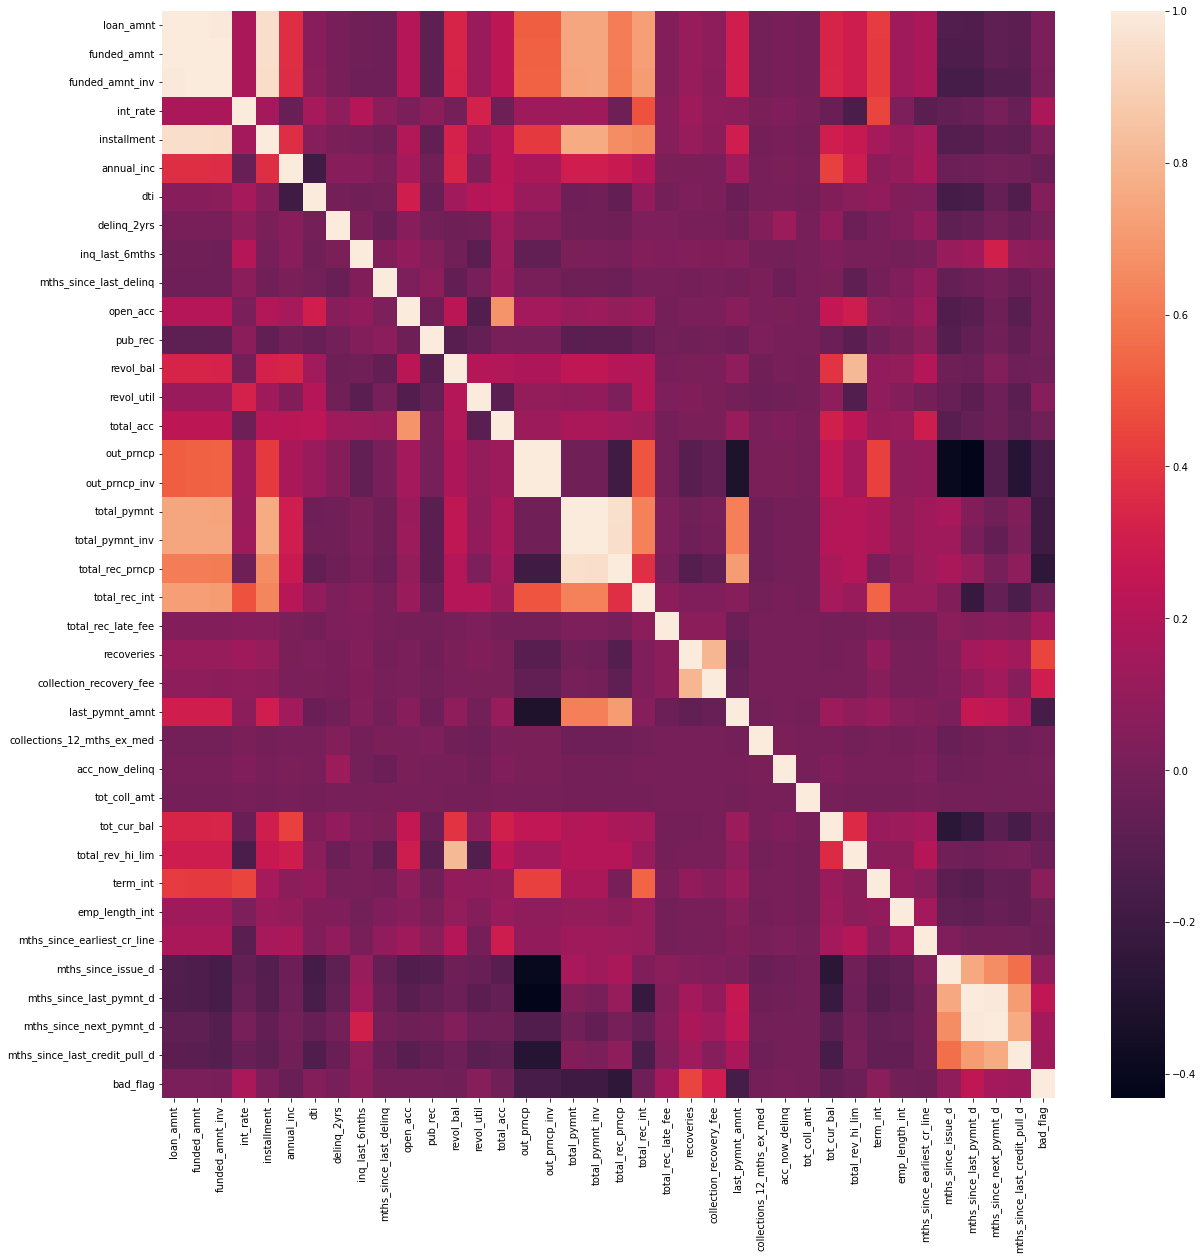

In [51]:
plt.figure(figsize=(20,20))
sns.heatmap(data_raw.corr())

In [52]:
corr_matrix = data_raw.corr().abs()
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))
drop_hicorr = [column for column in upper.columns if any(upper[column] > 0.7)]

C:\Users\User\AppData\Local\Temp/ipykernel_8320/1658018118.py:2: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))


Membuat list kolom yang memiliki korelasi > 0.7, karena banyaknya kolom yang memiliki korelasi tinggi menyebabkan model menjadi kurang optimal.

In [53]:
drop_hicorr

['funded_amnt',
 'funded_amnt_inv',
 'installment',
 'out_prncp_inv',
 'total_pymnt',
 'total_pymnt_inv',
 'total_rec_prncp',
 'total_rec_int',
 'collection_recovery_fee',
 'last_pymnt_amnt',
 'total_rev_hi_lim',
 'mths_since_last_pymnt_d',
 'mths_since_next_pymnt_d',
 'mths_since_last_credit_pull_d']

In [54]:
data_raw.drop(drop_hicorr,axis=1,inplace=True)

# Standarisasi dan One-Hot Encoding

## One-Hot Encoding 

In [55]:
categorical_cols = [col for col in data_raw.select_dtypes(include='object').columns.tolist()]

In [56]:
one_hot = pd.get_dummies(data_raw[categorical_cols], drop_first=True)
one_hot.head()

,grade_B,grade_C,grade_D,grade_E,grade_F,grade_G,sub_grade_A2,sub_grade_A3,sub_grade_A4,sub_grade_A5,...,addr_state_TN,addr_state_TX,addr_state_UT,addr_state_VA,addr_state_VT,addr_state_WA,addr_state_WI,addr_state_WV,addr_state_WY,initial_list_status_w
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## Standarisasi 

In [57]:
numerical_cols = [col for col in data_raw.columns.tolist() if col not in categorical_cols + ['bad_flag']]

In [58]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
std = pd.DataFrame(ss.fit_transform(data_raw[numerical_cols]), columns=numerical_cols)

In [59]:
std.head()

,loan_amnt,int_rate,annual_inc,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,open_acc,pub_rec,revol_bal,...,total_rec_late_fee,recoveries,collections_12_mths_ex_med,acc_now_delinq,tot_coll_amt,tot_cur_bal,term_int,emp_length_int,mths_since_earliest_cr_line,mths_since_issue_d
0,-1.124392,-0.729587,-0.896551,1.328632,-0.357012,0.178920,-0.708792,-1.641166,-0.31429,-0.124888,...,-0.123464,-0.154549,-0.083608,-0.058307,-0.012089,-0.792648,-0.616225,1.138605,1.768168,1.446626
1,-1.426088,0.330634,-0.787387,-2.065791,-0.357012,3.843328,-0.708792,-1.641166,-0.31429,-0.703378,...,-0.123464,0.057470,-0.083608,-0.058307,-0.012089,-0.792648,1.622784,-1.523744,-0.212289,1.446626
2,-1.438156,0.488979,-1.110294,-1.082491,-0.357012,1.095022,-0.708792,-1.841641,-0.31429,-0.642003,...,-0.123464,-0.154549,-0.083608,-0.058307,-0.012089,-0.792648,-0.616225,1.138605,-0.571319,1.446626
3,-0.521001,-0.077850,-0.438063,0.354248,-0.357012,0.178920,0.860811,-0.237839,-0.31429,-0.514224,...,3.099264,-0.154549,-0.083608,-0.058307,-0.012089,-0.792648,-0.616225,1.138605,0.227813,1.446626
4,-1.365749,-0.261438,0.122311,0.091865,-0.357012,-0.737182,0.991612,0.764538,-0.31429,0.558748,...,-0.123464,-0.154549,-0.083608,-0.058307,-0.012089,-0.792648,1.622784,-1.257509,0.239394,1.446626


In [60]:
data = pd.concat([one_hot, std, data_raw[['bad_flag']]], axis=1)

# Modeling

In [61]:
from sklearn.model_selection import train_test_split

In [62]:
X = data.drop('bad_flag', axis=1)
y = data['bad_flag']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [63]:
X_train.shape, X_test.shape

((373028, 133), (93257, 133))

In [64]:
from sklearn.tree import DecisionTreeClassifier

In [65]:
tree_model = DecisionTreeClassifier() 
 
# Melatih model dengan menggunakan data latih
tree_model = tree_model.fit(X_train, y_train)

In [66]:
# Evaluasi Model
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
 
y_pred = tree_model.predict(X_test)
  
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

# Menghitung akurasi
accuracy = accuracy_score(y_test, y_pred)
print("\nAccuracy:", accuracy)

# Menampilkan laporan klasifikasi
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Confusion Matrix:
[[78199  4868]
 [ 4269  5921]]

Accuracy: 0.9020234405996332

Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.94      0.94     83067
           1       0.55      0.58      0.56     10190

    accuracy                           0.90     93257
   macro avg       0.75      0.76      0.75     93257
weighted avg       0.90      0.90      0.90     93257



# Kesimpulan 

Hasil dari confusion matrix menunjukkan jumlah debitur yang berhasil ditebak secara benar bahwa debitur memiliki label pembayaran yang buruk ada 78199, sedangkan jumlah debitur yang berhasil ditebak sebagai pembayaran yang baik ada 5921

Kegagalan model dalam menebak debitur yang pembayarannya buruk ada 4868 sedangkan kegagalan model dalam menebak debitur yang pembayarannya baik ada 5921 

Model DecisionTree memiliki akurasi : 90.2%

# Saran

Menentukan fitur yang memiliki pengaruh paling besar dalam mengklasifikasikan pembayaran baik dan pembayaran buruk

Model dites menggunakan dataset yang baru untuk mengecek apakah model overfit atau tidak

Mereduksi dimensi se optimal mungkin agar model lebih ringan untuk digunakan